# Vasicek Interest Rate Model

Using Cholesky decomposition and Vasicek Interest Rate model to simulate correlated interest rates. 
Vasicek stated that there should be a mean reversion in the data. The Cholesky decomposition is used to generate correlated results.

https://www.investopedia.com/terms/v/vasicek-model.asp#:~:text=The%20term%20Vasicek%20Interest%20Rate,will%20move%20in%20the%20future.


In [1]:
from src.data import dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
zerocurve = dataset.Zerocurve()
zerocurve.load_data()
df_z = zerocurve.df

# start_date = df_z.index.min()
# end_date = df_z.index.max()
yield_data = df_z.pivot(columns = 'tenor', values = 'rate')
# Calculate the daily percentage change for each maturity
returns_df = yield_data.pct_change().dropna()

# Calculate the correlation matrix between the maturities
corr_matrix = returns_df.corr()

# Generate random numbers
n_rows = len(returns_df)
n_cols = len(returns_df.columns)
random_numbers = np.random.normal(size=(n_rows, n_cols))

2023-03-16 10:23:18.323 | INFO     | src.data.dataset:read_data:141 - reading zero curve data from ESW.


In [12]:
corr_matrix

tenor,1 Year,10 Years,15 Months,15 Years,18 Months,2 Years,3 Months,3 Years,30 Years,4 Years,5 Years,6 Months,7 Years,9 Months,ON
tenor,,,,,,,,,,,,,,,
1 Year,1.000000,0.001008,0.005070,-0.002027,0.009927,-0.000625,0.017218,0.002272,0.002136,0.000800,0.000537,0.015052,0.000404,0.018312,0.017218
10 Years,0.001008,1.000000,0.001033,-0.091408,0.000608,0.000888,0.000320,0.000965,0.090420,0.001253,0.000250,0.000344,0.004301,0.000557,0.000320
15 Months,0.005070,0.001033,1.000000,-0.002599,0.015738,-0.001793,-0.018742,0.002768,0.002927,0.000564,0.000495,0.013204,0.000570,0.004470,-0.018742
15 Years,-0.002027,-0.091408,-0.002599,1.000000,-0.001615,-0.000933,-0.000090,-0.003020,-0.987852,-0.006911,-0.002563,-0.001128,-0.029787,-0.001931,-0.000090
18 Months,0.009927,0.000608,0.015738,-0.001615,1.000000,-0.003505,-0.002006,0.000965,0.001586,-0.000134,0.000308,0.010618,0.000276,0.007651,-0.002006
2 Years,-0.000625,0.000888,-0.001793,-0.000933,-0.003505,1.000000,-0.001153,0.003557,0.001424,0.002410,0.000624,0.000621,0.001542,-0.000353,-0.001153
3 Months,0.017218,0.000320,-0.018742,-0.000090,-0.002006,-0.001153,1.000000,-0.001724,0.000318,0.000345,0.000259,0.002657,0.000381,0.005753,1.000000
3 Years,0.002272,0.000965,0.002768,-0.003020,0.000965,0.003557,-0.001724,1.000000,0.003051,0.000068,0.000909,0.000463,0.000295,0.001312,-0.001724
30 Years,0.002136,0.090420,0.002927,-0.987852,0.001586,0.001424,0.000318,0.003051,1.000000,0.007278,0.002700,0.001265,0.029990,0.002113,0.000318


In [7]:
# Use Cholesky decomposition to convert the correlation matrix into a matrix
# that can be used to generate correlated random numbers
cholesky_matrix = np.linalg.cholesky(corr_matrix)

# Multiply the Cholesky matrix by the random numbers to create correlated
# random numbers
correlated_numbers = np.matmul(cholesky_matrix, random_numbers.T).T
# Convert the correlated numbers into a Pandas DataFrame
simulated_returns_df = pd.DataFrame(data=correlated_numbers, columns=returns_df.columns)
# Scale the simulated returns to match the original data
simulated_returns_df = simulated_returns_df.multiply(returns_df.std()) + returns_df.mean()

# Convert the returns back to yields and add to the original yield curve
simulated_yield_df = yield_data.shift(1) * (1 + simulated_returns_df)

# Print the first few rows of the data
print(simulated_yield_df.head())

tenor                1 Year  10 Years  15 Months  15 Years  18 Months  \
2004-09-06 00:00:00     NaN       NaN        NaN       NaN        NaN   
2004-09-07 00:00:00     NaN       NaN        NaN       NaN        NaN   
2004-09-08 00:00:00     NaN       NaN        NaN       NaN        NaN   
2004-09-09 00:00:00     NaN       NaN        NaN       NaN        NaN   
2004-09-10 00:00:00     NaN       NaN        NaN       NaN        NaN   

tenor                2 Years  3 Months  3 Years  30 Years  4 Years  5 Years  \
2004-09-06 00:00:00      NaN       NaN      NaN       NaN      NaN      NaN   
2004-09-07 00:00:00      NaN       NaN      NaN       NaN      NaN      NaN   
2004-09-08 00:00:00      NaN       NaN      NaN       NaN      NaN      NaN   
2004-09-09 00:00:00      NaN       NaN      NaN       NaN      NaN      NaN   
2004-09-10 00:00:00      NaN       NaN      NaN       NaN      NaN      NaN   

tenor                6 Months  7 Years  9 Months  ON  
2004-09-06 00:00:00       NaN  

In [8]:
simulated_yield_df.to_excel('simulated_yield_df.xlsx')




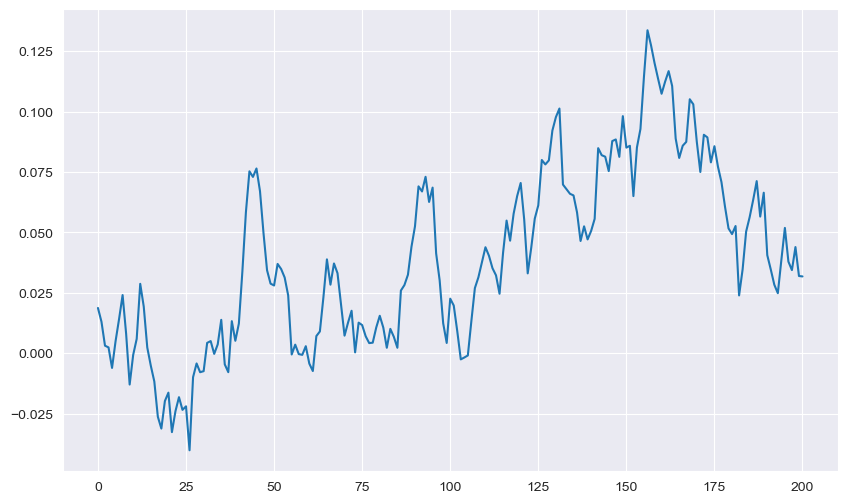

In [11]:
""" Simulate interest rate path by the Vasicek model """
import numpy as np

def vasicek(r0, K, theta, sigma, T=1., N=10, seed=777):    
    np.random.seed(seed)
    dt = T/float(N)    
    rates = [r0]
    for i in range(N):
        dr = K*(theta-rates[-1])*dt + sigma*np.random.normal()
        rates.append(rates[-1] + dr)
    return range(N+1), rates

if __name__ == "__main__":
    x, y = vasicek(0.01875, 0.20, 0.01, 0.012, 10., 200)

    import matplotlib.pyplot as plt
    plt.plot(x,y)
    plt.show()

2023-03-15 18:53:12.757 | INFO     | src.data.dataset:read_data:141 - reading zero curve data from ESW.


In [5]:
yield_data.corr()

tenor,1 Year,10 Years,15 Months,15 Years,18 Months,2 Years,3 Months,3 Years,30 Years,4 Years,5 Years,6 Months,7 Years,9 Months,ON
tenor,,,,,,,,,,,,,,,
1 Year,1.000000,0.752859,0.998155,0.775852,0.993327,0.978031,0.979256,0.937743,0.883745,0.895102,0.855429,0.990276,0.794073,0.997744,0.979256
10 Years,0.752859,1.000000,0.780221,0.995632,0.805474,0.848547,0.691209,0.910083,0.893289,0.948936,0.972794,0.700470,0.994308,0.724898,0.691209
15 Months,0.998155,0.780221,1.000000,0.800982,0.998463,0.988522,0.968228,0.955315,0.896823,0.916897,0.879820,0.980967,0.820937,0.991992,0.968228
15 Years,0.775852,0.995632,0.800982,1.000000,0.823949,0.862492,0.720746,0.916122,0.912536,0.949237,0.969380,0.727692,0.987953,0.750034,0.720746
18 Months,0.993327,0.805474,0.998463,0.823949,1.000000,0.995297,0.956441,0.969419,0.907944,0.935571,0.901397,0.970175,0.845422,0.983895,0.956441
2 Years,0.978031,0.848547,0.988522,0.862492,0.995297,1.000000,0.931500,0.988229,0.924212,0.963752,0.935796,0.946178,0.886393,0.963608,0.931500
3 Months,0.979256,0.691209,0.968228,0.720746,0.956441,0.931500,1.000000,0.880539,0.853550,0.832678,0.790699,0.996694,0.729124,0.989111,1.000000
3 Years,0.937743,0.910083,0.955315,0.916122,0.969419,0.988229,0.880539,1.000000,0.939492,0.992879,0.977329,0.895637,0.942187,0.917160,0.880539
30 Years,0.883745,0.893289,0.896823,0.912536,0.907944,0.924212,0.853550,0.939492,1.000000,0.941065,0.934958,0.856852,0.914366,0.869560,0.853550


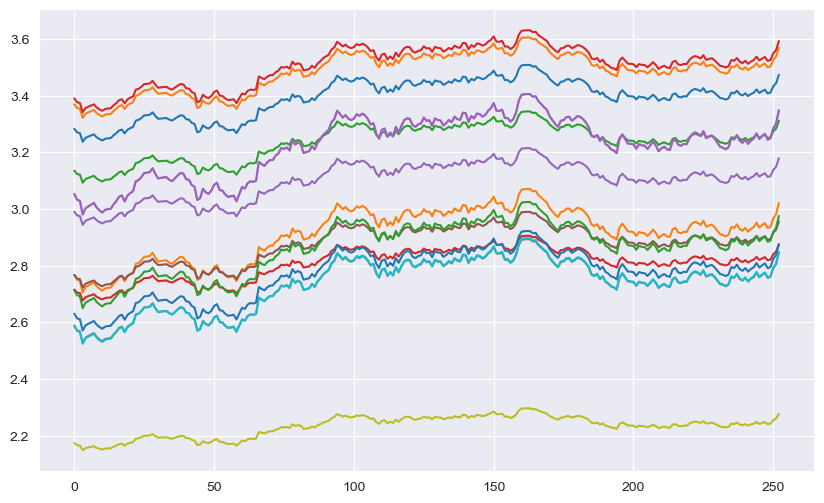

In [16]:

mu = rate_changes.mean().values
sigma = rate_changes.std().values

r0 = yield_data.iloc[-1].values # last observerd yield
T = 1 # time horizon
dt = 1/252 # time step

# Simple one factor vasicek model to simulate interest rates
def vasicek(r, mu, sigma, dt):
   return r + mu*dt + sigma*np.sqrt(dt)*np.random.normal()
   # return r + mu + sigma*np.random.normal()
# Prediction of interest rates
yield_curve = [r0]
for i in range(int(T/dt)):
    r = yield_curve[-1]
    yield_curve.append(vasicek(r, mu, sigma, dt))

plt.plot(yield_curve)
plt.show()

Check the correlation of mortgage interest rates and swap rates

In [7]:
interest = dataset.Interest()
interest.read_data()
df_i = interest.df.copy()
df_i.rename(columns = {'fixed_period': 'type'}, inplace = True)


2023-03-15 18:53:29.362 | INFO     | src.data.dataset:read_data:79 - reading interest data from ESW.


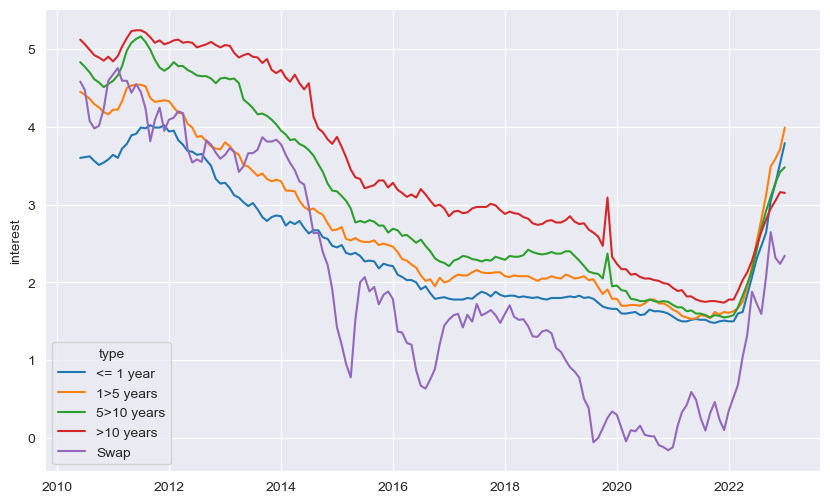

In [8]:
df_z10 = df_z[df_z['tenor']=='10 Years']
df_z10 = df_z10.drop(['value_dt','tenor'], axis = 'columns')
df_z10 = df_z10.resample('M').mean().reset_index()
df_z10['rate_dt'] = df_z10['rate_dt'].to_numpy().astype('datetime64[M]')
df_z10 = df_z10.set_index('rate_dt')
df_z10 = df_z10.rename(columns = {'rate':'interest'})
df_z10['type'] = 'Swap'
df_z10 = df_z10.loc[df_i.index.min(): df_i.index.max()]
df_report = pd.concat([df_i, df_z10])
sns.lineplot(data = df_report, x = df_report.index, y = 'interest', hue = 'type');